In [16]:
import pandas as pd
import numpy as np

# Loading CSV files
members = pd.read_csv("Members.csv")  # Member details
claims = pd.read_csv("Claims.csv")  # Claims data
labs = pd.read_csv("LabCount.csv")  # Lab tests
rx = pd.read_csv("DrugCount.csv")  # Prescription data
days_y2 = pd.read_csv("DaysInHospital_Y2.csv")  # Hospitalization data for Y2
days_y3 = pd.read_csv("DaysInHospital_Y3.csv")  # Hospitalization data for Y3

# Display basic info
print("Members Data:")
print(members.info(), "\n")

print("Claims Data:")
print(claims.info(), "\n")

print("Labs Data:")
print(labs.info(), "\n")

print("RX Data:")
print(rx.info(), "\n")

print("Days in Hospital Y2 Data:")
print(days_y2.info(), "\n")

print("Days in Hospital Y3 Data:")
print(days_y3.info(), "\n")


Members Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113000 entries, 0 to 112999
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   MemberID         113000 non-null  int64 
 1   AgeAtFirstClaim  107247 non-null  object
 2   Sex              95448 non-null   object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB
None 

Claims Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MemberID               int64  
 1   ProviderID             float64
 2   Vendor                 float64
 3   PCP                    float64
 4   Year                   object 
 5   Specialty              object 
 6   PlaceSvc               object 
 7   PayDelay               object 
 8   LengthOfStay           object 
 9   DSFS                   object 
 10  PrimaryConditionGroup  obj

In [17]:
members['AgeAtFirstClaim'].unique()

array(['70-79', '40-49', '0-9', '30-39', '50-59', '60-69', '10-19', '80+',
       '20-29', nan], dtype=object)

In [18]:
# Define age mapping
age_mapping = {
    "0-9": 1, "10-19": 2, "20-29": 3, "30-39": 4,
    "40-49": 5, "50-59": 6, "60-69": 7, "70-79": 8, "80+": 9
}

# Map age values
members["AgeAtFirstClaim"] = members["AgeAtFirstClaim"].map(age_mapping)

# Compute median
median_age = np.nanmedian(members["AgeAtFirstClaim"])

# Fill missing values with median
members["AgeAtFirstClaim"].fillna(median_age, inplace=True)

<ipython-input-18-aa966e36578d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  members["AgeAtFirstClaim"].fillna(median_age, inplace=True)


In [19]:
members['AgeAtFirstClaim'].unique()

array([8., 5., 1., 4., 6., 7., 2., 9., 3.])

In [20]:
# Fill missing values in Sex column with "U" (Unknown)
members["Sex"].fillna("U", inplace=True)

# Create a crosstab for MemberID and Sex
sex_crosstab = pd.crosstab(members["MemberID"], members["Sex"])

# Merge crosstab back to members DataFrame
members = members.merge(sex_crosstab, on="MemberID", how="left")

# Drop the original Sex column
members.drop(columns=["Sex"], inplace=True)

<ipython-input-20-59de6a3dab8e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  members["Sex"].fillna("U", inplace=True)


In [21]:
# Keep only Year 1 (Y1) and Year 2 (Y2) claims
claims = claims[claims["Year"].isin(["Y1", "Y2"])]
claims.drop(columns=["ProviderID", "Vendor", "PCP"], inplace=True, errors="ignore")
claims.head()

,MemberID,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
4,11837054,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0
6,99829076,Y1,Rehabilitation,Office,162+,NaN,0- 1 month,TRAUMA,0,MED,0
7,54666321,Y1,Diagnostic Imaging,Office,29,NaN,0- 1 month,RESPR4,0,RAD,0
8,60497718,Y2,Rehabilitation,Office,42,NaN,1- 2 months,INFEC4,0,EM,0


In [22]:
# Fill missing values in Specialty column with "Other"
claims["Specialty"].fillna("Other", inplace=True)
claims["PlaceSvc"].fillna("Other", inplace=True)

# Split claims into Year 1 and Year 2
claims_y1 = claims[claims["Year"] == "Y1"]
claims_y2 = claims[claims["Year"] == "Y2"]

# Replace "Other" in Specialty and PlaceSvc with more specific names
claims_y1["Specialty"].replace("Other", "Other_Specialty", inplace=True)
claims_y2["Specialty"].replace("Other", "Other_Specialty", inplace=True)

claims_y1["PlaceSvc"].replace("Other", "Other_PlaceSvc", inplace=True)
claims_y2["PlaceSvc"].replace("Other", "Other_PlaceSvc", inplace=True)

# Create crosstabs for Specialty and PlaceSvc count per MemberID in Year 1 and Year 2
specialty_y1 = pd.crosstab(claims_y1["MemberID"], claims_y1["Specialty"])
specialty_y2 = pd.crosstab(claims_y2["MemberID"], claims_y2["Specialty"])

placesvc_y1 = pd.crosstab(claims_y1["MemberID"], claims_y1["PlaceSvc"])
placesvc_y2 = pd.crosstab(claims_y2["MemberID"], claims_y2["PlaceSvc"])

# Merge with members_y1 and members_y2 using INNER JOIN
members_y1 = members.merge(specialty_y1, on="MemberID", how="inner")
members_y1 = members_y1.merge(placesvc_y1, on="MemberID", how="inner")

members_y2 = members.merge(specialty_y2, on="MemberID", how="inner")
members_y2 = members_y2.merge(placesvc_y2, on="MemberID", how="inner")

<ipython-input-22-18192edbf9d4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  claims["Specialty"].fillna("Other", inplace=True)
<ipython-input-22-18192edbf9d4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [23]:
# Convert "162+" to 162 and ensure numeric
claims_y1.loc[:, "PayDelay"] = claims_y1["PayDelay"].replace("162+", "162").astype(float)
claims_y2.loc[:, "PayDelay"] = claims_y2["PayDelay"].replace("162+", "162").astype(float)

# Define bin edges and labels (1 to 17)
bin_edges = list(range(0, 171, 10))
bin_labels = list(range(1, len(bin_edges)))

# Apply binning to categorize PayDelay
claims_y1.loc[:, "PayDelay_Binned"] = pd.cut(claims_y1["PayDelay"], bins=bin_edges, labels=bin_labels, include_lowest=True)
claims_y2.loc[:, "PayDelay_Binned"] = pd.cut(claims_y2["PayDelay"], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Convert the categorical bins to integer type
claims_y1["PayDelay_Binned"] = claims_y1["PayDelay_Binned"].astype(float)
claims_y2["PayDelay_Binned"] = claims_y2["PayDelay_Binned"].astype(float)

# Replace NaN with the median bin value
median_bin_y1 = claims_y1["PayDelay_Binned"].median()
median_bin_y2 = claims_y2["PayDelay_Binned"].median()

claims_y1.loc[:, "PayDelay_Binned"] = claims_y1["PayDelay_Binned"].fillna(median_bin_y1).astype(int)
claims_y2.loc[:, "PayDelay_Binned"] = claims_y2["PayDelay_Binned"].fillna(median_bin_y2).astype(int)

# Create crosstabs for PayDelay categories per MemberID
paydelay_y1 = pd.crosstab(claims_y1["MemberID"], claims_y1["PayDelay_Binned"])
paydelay_y2 = pd.crosstab(claims_y2["MemberID"], claims_y2["PayDelay_Binned"])

# Merge with members_y1 and members_y2 using INNER JOIN
members_y1 = members_y1.merge(paydelay_y1, on="MemberID", how="inner")
members_y2 = members_y2.merge(paydelay_y2, on="MemberID", how="inner")

<ipython-input-23-2d22169f2f78>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y1.loc[:, "PayDelay_Binned"] = pd.cut(claims_y1["PayDelay"], bins=bin_edges, labels=bin_labels, include_lowest=True)
<ipython-input-23-2d22169f2f78>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y2.loc[:, "PayDelay_Binned"] = pd.cut(claims_y2["PayDelay"], bins=bin_edges, labels=bin_labels, include_lowest=True)
<ipython-input-23-2d22169f2f78>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [24]:
# Define mapping for LengthOfStay categories
los_mapping = {
    "1 day": 1, "2 days": 2, "3 days": 3, "4 days": 4, "5 days": 5, "6 days": 6,
    "1- 2 weeks": 10, "2- 4 weeks": 20, "4- 8 weeks": 40
}

# Replace values in LengthOfStay with mapped values, and fill NaNs with 0
claims_y1["LengthOfStay"] = claims_y1["LengthOfStay"].map(los_mapping).fillna(0).astype(int)
claims_y2["LengthOfStay"] = claims_y2["LengthOfStay"].map(los_mapping).fillna(0).astype(int)

# Aggregate LengthOfStay per MemberID (sum over all claims in each year)
lengthofstay_y1 = claims_y1.groupby("MemberID")["LengthOfStay"].sum().reset_index()
lengthofstay_y2 = claims_y2.groupby("MemberID")["LengthOfStay"].sum().reset_index()

# Rename for clarity before merging
lengthofstay_y1.rename(columns={"LengthOfStay": "Total_LengthOfStay"}, inplace=True)
lengthofstay_y2.rename(columns={"LengthOfStay": "Total_LengthOfStay"}, inplace=True)

# Merge with members_y1 and members_y2 using INNER JOIN
members_y1 = members_y1.merge(lengthofstay_y1, on="MemberID", how="inner")
members_y2 = members_y2.merge(lengthofstay_y2, on="MemberID", how="inner")

<ipython-input-24-e2246d052404>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y1["LengthOfStay"] = claims_y1["LengthOfStay"].map(los_mapping).fillna(0).astype(int)
<ipython-input-24-e2246d052404>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y2["LengthOfStay"] = claims_y2["LengthOfStay"].map(los_mapping).fillna(0).astype(int)


In [25]:
# Fill missing values with mode
mode_dsfs_y1 = claims_y1["DSFS"].mode()[0]
mode_dsfs_y2 = claims_y2["DSFS"].mode()[0]

claims_y1["DSFS"].fillna(mode_dsfs_y1, inplace=True)
claims_y2["DSFS"].fillna(mode_dsfs_y2, inplace=True)

# Create crosstabs for DSFS categories per MemberID
dsfs_y1 = pd.crosstab(claims_y1["MemberID"], claims_y1["DSFS"])
dsfs_y2 = pd.crosstab(claims_y2["MemberID"], claims_y2["DSFS"])

# Merge with members_y1 and members_y2 using INNER JOIN
members_y1 = members_y1.merge(dsfs_y1, on="MemberID", how="inner")
members_y2 = members_y2.merge(dsfs_y2, on="MemberID", how="inner")

<ipython-input-25-7f60dfe4643c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  claims_y1["DSFS"].fillna(mode_dsfs_y1, inplace=True)
<ipython-input-25-7f60dfe4643c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y1["DSFS"].fillna(mode_dsfs_y1, inplace=True)
<ipython-input-25-7f60dfe4643c>:6: FutureWarning: A value is trying to be set

In [26]:
# Replace NaN values with "Other_PrimaryCondition"
claims_y1["PrimaryConditionGroup"].fillna("Other_PrimaryCondition", inplace=True)
claims_y2["PrimaryConditionGroup"].fillna("Other_PrimaryCondition", inplace=True)

# Create crosstabs for PrimaryConditionGroup per MemberID
primary_condition_y1 = pd.crosstab(claims_y1["MemberID"], claims_y1["PrimaryConditionGroup"])
primary_condition_y2 = pd.crosstab(claims_y2["MemberID"], claims_y2["PrimaryConditionGroup"])

# Merge with members_y1 and members_y2 using INNER JOIN
members_y1 = members_y1.merge(primary_condition_y1, on="MemberID", how="inner")
members_y2 = members_y2.merge(primary_condition_y2, on="MemberID", how="inner")

<ipython-input-26-e9c8dc13acf4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  claims_y1["PrimaryConditionGroup"].fillna("Other_PrimaryCondition", inplace=True)
<ipython-input-26-e9c8dc13acf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y1["PrimaryConditionGroup"].fillna("Other_PrimaryCondition", inplace=True)
<ipython-input-26-e

In [27]:
# Replace '0' with 'Zero' in CharlsonIndex
claims_y1["CharlsonIndex"] = claims_y1["CharlsonIndex"].replace("0", "Zero")
claims_y2["CharlsonIndex"] = claims_y2["CharlsonIndex"].replace("0", "Zero")

# Create crosstabs for CharlsonIndex per MemberID
charlson_y1 = pd.crosstab(claims_y1["MemberID"], claims_y1["CharlsonIndex"])
charlson_y2 = pd.crosstab(claims_y2["MemberID"], claims_y2["CharlsonIndex"])

# Merge with members_y1 and members_y2 using INNER JOIN
members_y1 = members_y1.merge(charlson_y1, on="MemberID", how="inner")
members_y2 = members_y2.merge(charlson_y2, on="MemberID", how="inner")

<ipython-input-27-5d9b36916e6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y1["CharlsonIndex"] = claims_y1["CharlsonIndex"].replace("0", "Zero")
<ipython-input-27-5d9b36916e6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y2["CharlsonIndex"] = claims_y2["CharlsonIndex"].replace("0", "Zero")


In [28]:
# Replace NaN values with "Other_Procedure"
claims_y1["ProcedureGroup"].fillna("Other_Procedure", inplace=True)
claims_y2["ProcedureGroup"].fillna("Other_Procedure", inplace=True)

# Create crosstabs for ProcedureGroup per MemberID
procedure_y1 = pd.crosstab(claims_y1["MemberID"], claims_y1["ProcedureGroup"])
procedure_y2 = pd.crosstab(claims_y2["MemberID"], claims_y2["ProcedureGroup"])

# Merge with members_y1 and members_y2 using INNER JOIN
members_y1 = members_y1.merge(procedure_y1, on="MemberID", how="inner")
members_y2 = members_y2.merge(procedure_y2, on="MemberID", how="inner")

<ipython-input-28-44f0f059c1ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  claims_y1["ProcedureGroup"].fillna("Other_Procedure", inplace=True)
<ipython-input-28-44f0f059c1ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_y1["ProcedureGroup"].fillna("Other_Procedure", inplace=True)
<ipython-input-28-44f0f059c1ab>:3: FutureWarnin

In [29]:
# Split Labs data into Y1 and Y2
labs_y1 = labs[labs["Year"] == "Y1"]
labs_y2 = labs[labs["Year"] == "Y2"]

# Convert "10+" to 10 and ensure numeric type
labs_y1["LabCount"] = labs_y1["LabCount"].replace("10+", "10").astype(int)
labs_y2["LabCount"] = labs_y2["LabCount"].replace("10+", "10").astype(int)

# Aggregate LabCount per MemberID using sum
labcount_y1 = labs_y1.groupby("MemberID")["LabCount"].sum().reset_index()
labcount_y2 = labs_y2.groupby("MemberID")["LabCount"].sum().reset_index()

# Rename for clarity before merging
labcount_y1.rename(columns={"LabCount": "Total_LabCount"}, inplace=True)
labcount_y2.rename(columns={"LabCount": "Total_LabCount"}, inplace=True)

# Merge with members_y1 and members_y2 using LEFT JOIN
members_y1 = members_y1.merge(labcount_y1, on="MemberID", how="left")
members_y2 = members_y2.merge(labcount_y2, on="MemberID", how="left")

median_labcount_y1 = labcount_y1["Total_LabCount"].median()
median_labcount_y2 = labcount_y2["Total_LabCount"].median()

members_y1["Total_LabCount"].fillna(median_labcount_y1, inplace=True)
members_y2["Total_LabCount"].fillna(median_labcount_y2, inplace=True)

<ipython-input-29-f96bb386036b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labs_y1["LabCount"] = labs_y1["LabCount"].replace("10+", "10").astype(int)
<ipython-input-29-f96bb386036b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labs_y2["LabCount"] = labs_y2["LabCount"].replace("10+", "10").astype(int)
<ipython-input-29-f96bb386036b>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas

In [30]:
# Split RX data into Y1 and Y2
rx_y1 = rx[rx["Year"] == "Y1"]
rx_y2 = rx[rx["Year"] == "Y2"]

# Convert "7+" to 7 and ensure numeric type
rx_y1["DrugCount"] = rx_y1["DrugCount"].replace("7+", "7").astype(int)
rx_y2["DrugCount"] = rx_y2["DrugCount"].replace("7+", "7").astype(int)

# Aggregate DrugCount per MemberID using sum
drugcount_y1 = rx_y1.groupby("MemberID")["DrugCount"].sum().reset_index()
drugcount_y2 = rx_y2.groupby("MemberID")["DrugCount"].sum().reset_index()

# Rename for clarity before merging
drugcount_y1.rename(columns={"DrugCount": "Total_DrugCount"}, inplace=True)
drugcount_y2.rename(columns={"DrugCount": "Total_DrugCount"}, inplace=True)

# Merge with members_y1 and members_y2 using LEFT JOIN
members_y1 = members_y1.merge(drugcount_y1, on="MemberID", how="left")
members_y2 = members_y2.merge(drugcount_y2, on="MemberID", how="left")

median_drugcount_y1 = drugcount_y1["Total_DrugCount"].median()
median_drugcount_y2 = drugcount_y2["Total_DrugCount"].median()

members_y1["Total_DrugCount"].fillna(median_drugcount_y1, inplace=True)
members_y2["Total_DrugCount"].fillna(median_drugcount_y2, inplace=True)

<ipython-input-30-2426a88a4e61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rx_y1["DrugCount"] = rx_y1["DrugCount"].replace("7+", "7").astype(int)
<ipython-input-30-2426a88a4e61>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rx_y2["DrugCount"] = rx_y2["DrugCount"].replace("7+", "7").astype(int)
<ipython-input-30-2426a88a4e61>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. Th

In [31]:
# Merge DaysInHospital_Y2 with members_y1
members_y1 = members_y1.merge(days_y2, on="MemberID", how="inner")

# Merge DaysInHospital_Y3 with members_y2
members_y2 = members_y2.merge(days_y3, on="MemberID", how="inner")

In [32]:
print(members_y1.info())
print(members_y2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Columns: 127 entries, MemberID to DaysInHospital
dtypes: float64(3), int64(124)
memory usage: 73.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71435 entries, 0 to 71434
Columns: 127 entries, MemberID to DaysInHospital
dtypes: float64(3), int64(124)
memory usage: 69.2 MB
None


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Remove MemberID column and concatenate both datasets
combined_data = pd.concat([members_y1.drop(columns=["MemberID"]), members_y2.drop(columns=["MemberID"])])

# Convert column names to strings
combined_data.columns = combined_data.columns.astype(str)
print(combined_data.head())

# Define target variable (DaysInHospital)
X = combined_data.drop(columns=["DaysInHospital"])
y = combined_data["DaysInHospital"]

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Display feature importance (coefficients)
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
feature_importance.sort_values(by="Coefficient", ascending=False, inplace=True)

print("\n=== Feature Importance ===")
print(feature_importance.to_string(index=False))  # Print full table without truncation

   AgeAtFirstClaim  F  M  U  Anesthesiology  Diagnostic Imaging  Emergency  \
0              8.0  0  1  0               0                   1          0   
1              8.0  0  1  0               0                   0          2   
2              8.0  0  1  0               0                   0          1   
3              5.0  0  1  0               0                   1          0   
4              1.0  0  1  0               0                   0          0   

   General Practice  Internal  Laboratory  ...  SMCD  SMS  SNS  SO  SRS  SUS  \
0                 0         2           2  ...     0    0    0   0    0    0   
1                 0        11           2  ...     0    0    0   0    1    0   
2                 0         5           4  ...     0    0    0   0    0    0   
3                 2         0           0  ...     0    0    0   0    0    0   
4                 0         0           2  ...     0    0    0   0    0    0   

   Total_LabCount  Total_DrugCount  ClaimsTruncate

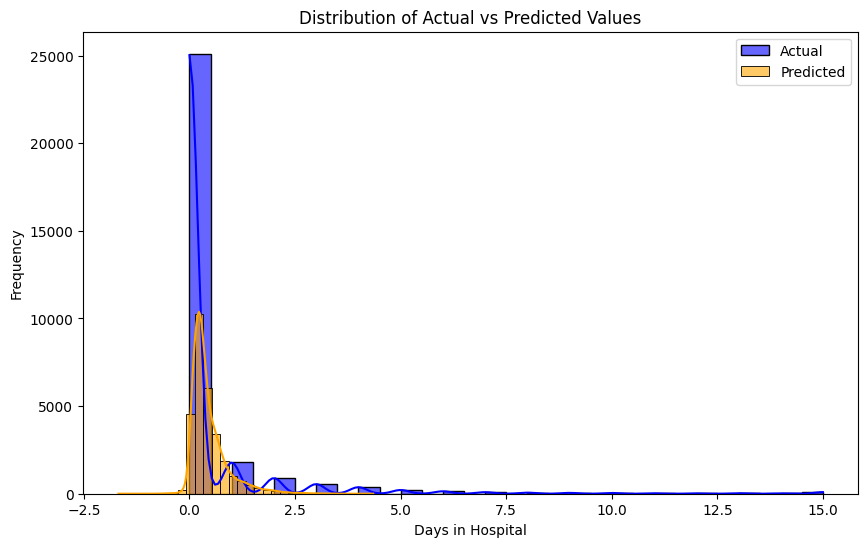

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=30, label="Actual", kde=True, color="blue", alpha=0.6)
sns.histplot(y_pred, bins=30, label="Predicted", kde=True, color="orange", alpha=0.6)
plt.xlabel("Days in Hospital")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()
plt.show()


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model Performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("\n=== Random Forest Regression Performance ===")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


=== Random Forest Regression Performance ===
RMSE: 1.55
R² Score: 0.0203


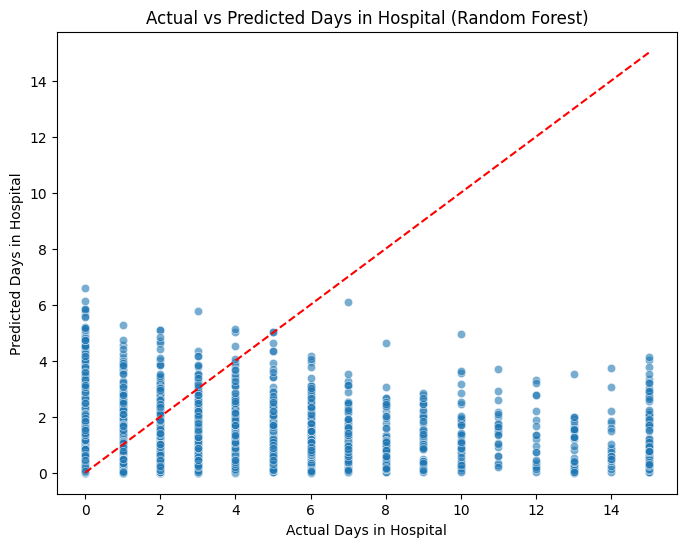

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Diagonal reference line
plt.xlabel("Actual Days in Hospital")
plt.ylabel("Predicted Days in Hospital")
plt.title("Actual vs Predicted Days in Hospital (Random Forest)")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 3.2422 - mae: 0.6934 - val_loss: 2.3501 - val_mae: 0.6959
Epoch 2/50
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 2.2884 - mae: 0.6933 - val_loss: 2.3474 - val_mae: 0.7030
Epoch 3/50
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.3377 - mae: 0.7009 - val_loss: 2.3277 - val_mae: 0.6467
Epoch 4/50
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 2.3025 - mae: 0.6957 - val_loss: 2.3290 - val_mae: 0.6841
Epoch 5/50
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 2.3159 - mae: 0.6942 - val_loss: 2.3270 - val_mae: 0.7460
Epoch 6/50
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 2.2592 - mae: 0.6916 - val_loss: 2.3216 - val_mae: 0.6403
Epoch 7/50
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 2.2465 - mae: 0.6847 - val_loss: 2.3185 - val_mae: 0.7536
Epoch 8/50
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 2.2961 - mae: 0.6916 - val_loss: 2.3129 - val_mae: 0.6853
Epoch 9/50
3687/3687 ━━━━━━━━━━━

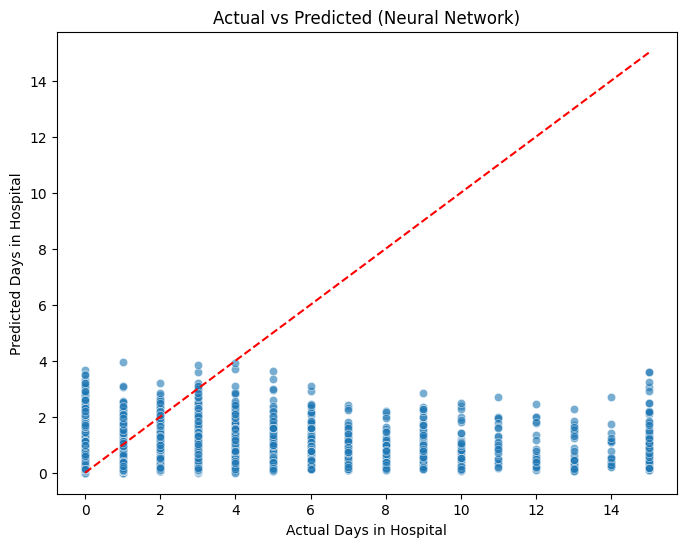

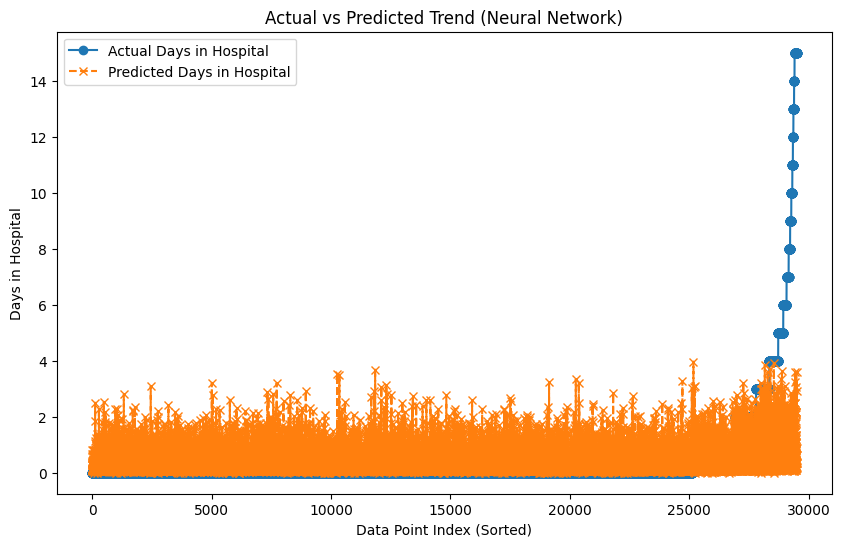

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the features (Neural Networks work better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Neural Network Model with L2 Regularization (Ridge)
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Hidden layer 2
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Hidden layer 3
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test).flatten()

# Clip predictions to valid range [0, 15]
y_pred_nn = np.clip(y_pred_nn, 0, 15)

# Evaluate Model Performance
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

# Print results
print("\n=== Neural Network Regression Performance ===")
print(f"RMSE: {rmse_nn:.2f}")
print(f"R² Score: {r2_nn:.4f}")


## Scatter Plot (Actual vs Predicted)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_nn, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Reference line
plt.xlabel("Actual Days in Hospital")
plt.ylabel("Predicted Days in Hospital")
plt.title("Actual vs Predicted (Neural Network)")
plt.show()

## Line Plot (Trend of Predictions)
sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_nn_sorted = y_pred_nn[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted.values, label="Actual Days in Hospital", marker='o', linestyle='-')
plt.plot(y_pred_nn_sorted, label="Predicted Days in Hospital", marker='x', linestyle='--')
plt.xlabel("Data Point Index (Sorted)")
plt.ylabel("Days in Hospital")
plt.title("Actual vs Predicted Trend (Neural Network)")
plt.legend()
plt.show()

